In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
import cartopy

In [2]:
SST = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_TS_piControl.nc')
SST.load()

TAS = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_TREFHT_piControl.nc')
TAS.load()

surface = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_Surfacefluxes.nc')
surface.load()

TOA = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_TOAfluxes.nc')
TOA.load()

horiz = xr.open_dataarray('/data/keeling/a/mailes2/a/alt_compset_processed/CESM1_E_Horizfluxes.nc')
horiz.load()

<xarray.DataArray (time: 10812, lat: 88, lon: 179)>
array([[[ 42.53542777,  41.927426  ,  42.58697592, ...,  43.21527401,
          43.25190393,  41.80356174],
        [ 42.87182134,  43.14402141,  42.71662311, ...,  46.01358524,
          44.63607445,  45.88991679],
        [ 46.99448397,  46.83794392,  46.28594548, ...,  49.82213598,
          49.17078888,  46.92960561],
        ...,
        [136.48443915, 136.40939829, 136.491963  , ..., 137.46363015,
         136.85699853, 136.13773218],
        [134.6040023 , 134.52763522, 134.42945035, ..., 135.66291789,
         135.08495096, 134.45514554],
        [134.10991327, 133.78173311, 133.7355444 , ..., 134.64990205,
         134.654816  , 134.60242641]],

       [[ 73.43730374,  72.7522067 ,  72.9338999 , ...,  74.44936102,
          74.22802165,  73.29133068],
        [ 73.82323661,  73.48583438,  72.55434423, ...,  77.24610901,
          76.16156273,  76.66161903],
        [ 79.78070879,  79.39099212,  78.36946834, ...,  82.23181212,
          81.64643364,  80.21509869],
...
        [145.80082752, 145.46322935, 144.98596023, ..., 144.22162024,
         144.83483583, 144.85281295],
        [143.1687141 , 143.2081641 , 143.44666857, ..., 142.2610482 ,
         142.49357712, 142.72101174],
        [139.87184226, 139.70382912, 139.44103997, ..., 139.30576986,
         139.21305934, 139.36638564]],

       [[ 37.38007473,  38.54635248,  36.73267708, ...,  39.27224321,
          37.84623209,  38.30585624],
        [ 38.48436333,  39.71115466,  36.69526726, ...,  39.22772811,
          39.50943882,  38.90367677],
        [ 41.89283781,  40.65896134,  41.24825878, ...,  42.1660493 ,
          43.2446226 ,  42.67647113],
        ...,
        [144.14055786, 144.10567247, 143.94833769, ..., 143.763489  ,
         144.08599066, 143.85770654],
        [141.9112196 , 141.86505245, 142.09410129, ..., 141.92053193,
         141.79051393, 141.90649517],
        [140.19512481, 139.9804932 , 139.82223242, ..., 139.13139249,
         139.30773424, 139.42584899]]])
Coordinates:
  * time     (time) object 0101-02-01 00:00:00 ... 1002-01-01 00:00:00
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357

In [5]:
def monthly_fit(sst_dataset, toa_dataset, datatype='none'):
    """
    Monthly regression
    
    """
    # Remove seasonality
    climatology_sst = sst_dataset.groupby('time.month').mean('time')
    sst_anomalies = sst_dataset.groupby('time.month') - climatology_sst
    climatology_toa = toa_dataset.groupby('time.month').mean('time')
    toa_anomalies = toa_dataset.groupby('time.month') - climatology_toa
    
    SST_TOAfit = xr.DataArray(np.zeros((88,179)), dims=['lat','lon'])
    lat_index = 0
    for lat in toa_dataset.coords['lat'].values:
        lon_index = 0
        for lon in toa_dataset.coords['lon'].values:
            SST_slice = sst_anomalies.sel(lat=lat).sel(lon=lon)
            TOA_slice = toa_anomalies.sel(lat=lat).sel(lon=lon)
            SST_TOAfit[lat_index, lon_index] = np.polyfit(SST_slice, TOA_slice, deg=1)[0]     
            lon_index += 1
        lat_index += 1

    SST_TOAfit.coords['lon'] = toa_dataset['lon'].values
    SST_TOAfit.coords['lat'] = toa_dataset['lat'].values
    SST_TOAfit
    return SST_TOAfit

# Surface

In [22]:
sst_surface_fit = monthly_fit(SST, surface)
sst_surface_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.74328579, 0.75097435, 0.76222849, ..., 0.74615111, 0.74350044,
        0.74332133],
       [0.75123443, 0.76584851, 0.78207989, ..., 0.73028176, 0.73942582,
        0.739233  ],
       [0.73408637, 0.73254153, 0.75007324, ..., 0.72164888, 0.73198422,
        0.72415107],
       ...,
       [0.8322109 , 0.84319257, 0.85061877, ..., 0.74798862, 0.78436851,
        0.81260529],
       [0.74321957, 0.73678503, 0.75861026, ..., 0.70425586, 0.69519149,
        0.72447115],
       [0.73897091, 0.73106102, 0.71601652, ..., 0.68693149, 0.69144731,
        0.71466975]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TS and Surface Radiation')

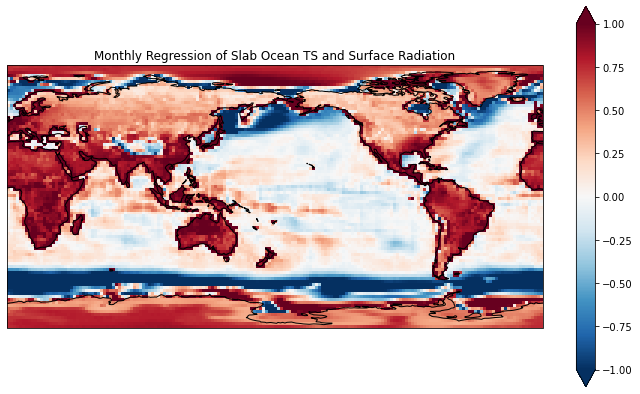

In [23]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_surface_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-1, vmax=1)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TS and Surface Radiation')

In [14]:
tas_surface_fit = monthly_fit(TAS, surface)
tas_surface_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[0.74184901, 0.74760157, 0.75920678, ..., 0.74438682, 0.74173309,
        0.74168977],
       [0.74992395, 0.76328266, 0.77910351, ..., 0.73201644, 0.74088149,
        0.74087662],
       [0.7115681 , 0.71011963, 0.72736004, ..., 0.69932827, 0.70878316,
        0.70171343],
       ...,
       [0.8477927 , 0.8590745 , 0.86752327, ..., 0.76151847, 0.79818894,
        0.82697417],
       [0.75582395, 0.7500185 , 0.77129785, ..., 0.71572917, 0.70747598,
        0.73683512],
       [0.7523799 , 0.74441541, 0.72974641, ..., 0.70145427, 0.70601033,
        0.72886834]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TAS and Surface Radiation')

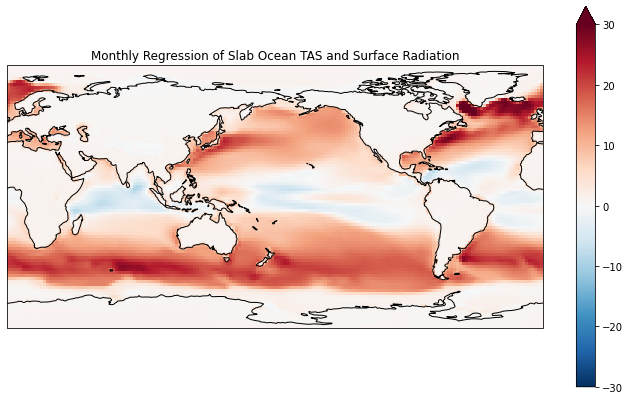

In [17]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
tas_surface_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-30, vmax=30)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TAS and Surface Radiation')

# TOA

In [18]:
sst_toa_fit = monthly_fit(SST, TOA)
sst_toa_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[-1.60899469, -1.61169936, -1.5961524 , ..., -1.62326224,
        -1.59954045, -1.6056194 ],
       [-1.63050955, -1.64386744, -1.62546   , ..., -1.59803478,
        -1.60336018, -1.6255948 ],
       [-1.46252189, -1.47345701, -1.47447207, ..., -1.42845477,
        -1.42612197, -1.43779291],
       ...,
       [-1.171011  , -1.15451771, -1.1394777 , ..., -1.24796457,
        -1.232324  , -1.21233945],
       [-1.25057633, -1.239398  , -1.23061762, ..., -1.29198954,
        -1.2794765 , -1.26780997],
       [-1.27994656, -1.27565129, -1.27032139, ..., -1.30297032,
        -1.29648925, -1.28924308]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TS and TOA Radiation')

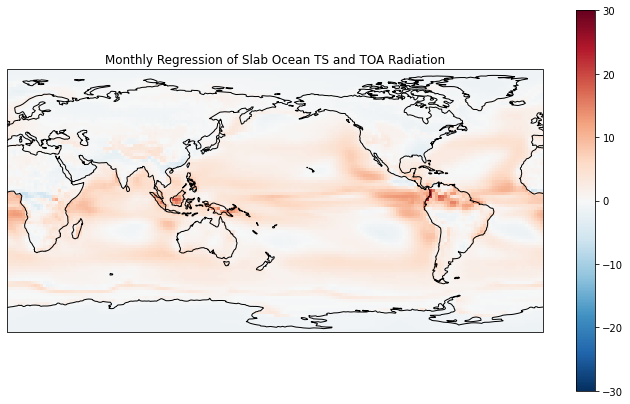

In [25]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_toa_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-30, vmax=30)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TS and TOA Radiation')

In [24]:
tas_toa_fit = monthly_fit(TAS, TOA)
tas_toa_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[-1.59001334, -1.59277437, -1.57066995, ..., -1.60628012,
        -1.59182705, -1.59709149],
       [-1.62264149, -1.62145171, -1.59561203, ..., -1.5910073 ,
        -1.60146826, -1.6125221 ],
       [-1.39355839, -1.40416723, -1.40638786, ..., -1.36167372,
        -1.36002916, -1.36918036],
       ...,
       [-1.19715648, -1.17999138, -1.16463725, ..., -1.27705026,
        -1.26004119, -1.23895087],
       [-1.27804192, -1.26658418, -1.2569595 , ..., -1.32120391,
        -1.30846037, -1.29604592],
       [-1.30623577, -1.30208188, -1.29691427, ..., -1.33062067,
        -1.3238444 , -1.3160249 ]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TAS and TOA Radiation')

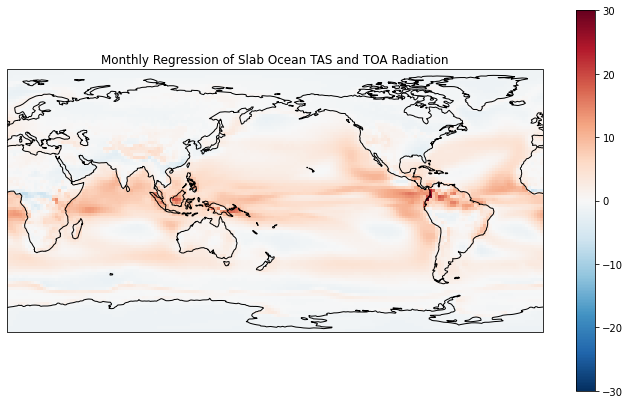

In [26]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
tas_toa_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-30, vmax=30)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TAS and TOA Radiation')

# Horiz. Radiation

In [27]:
sst_horiz_fit = monthly_fit(SST, horiz)
sst_horiz_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[2.35228048, 2.36267371, 2.35838089, ..., 2.36941335, 2.34304089,
        2.34894074],
       [2.38174398, 2.40971595, 2.40753989, ..., 2.32831653, 2.342786  ,
        2.3648278 ],
       [2.19660826, 2.20599854, 2.22454531, ..., 2.15010366, 2.15810619,
        2.16194399],
       ...,
       [2.0032219 , 1.99771027, 1.99009648, ..., 1.99595319, 2.01669251,
        2.02494474],
       [1.9937959 , 1.97618303, 1.98922787, ..., 1.9962454 , 1.974668  ,
        1.99228112],
       [2.01891747, 2.00671231, 1.98633791, ..., 1.98990182, 1.98793657,
        2.00391283]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TS and Horiz. Heat Flux')

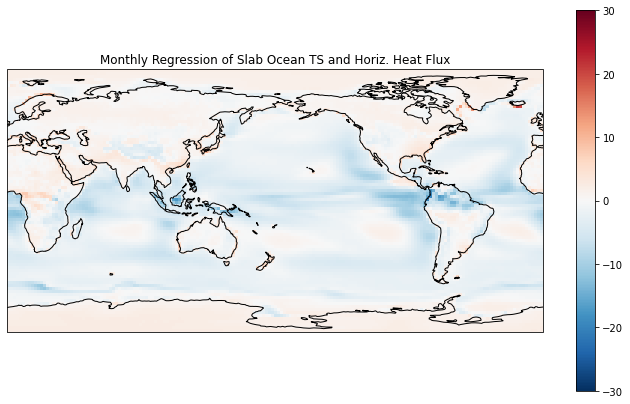

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
sst_horiz_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-30, vmax=30)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TS and Horiz. Heat Flux')

In [29]:
tas_horiz_fit = monthly_fit(TAS, horiz)
tas_horiz_fit

<xarray.DataArray (lat: 88, lon: 179)>
array([[2.33186235, 2.34037594, 2.32987672, ..., 2.35066695, 2.33356014,
        2.33878125],
       [2.37256543, 2.38473437, 2.37471554, ..., 2.32302373, 2.34234974,
        2.35339872],
       [2.10512649, 2.11428686, 2.1337479 , ..., 2.06100199, 2.06881232,
        2.07089379],
       ...,
       [2.04494917, 2.03906588, 2.03216051, ..., 2.03856873, 2.05823013,
        2.06592505],
       [2.03386588, 2.01660268, 2.02825735, ..., 2.03693308, 2.01593634,
        2.03288104],
       [2.05861567, 2.04649729, 2.02666068, ..., 2.03207494, 2.02985472,
        2.04489323]])
Coordinates:
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87

Text(0.5, 1.0, 'Monthly Regression of Slab Ocean TAS and Horiz. Heat Flux')

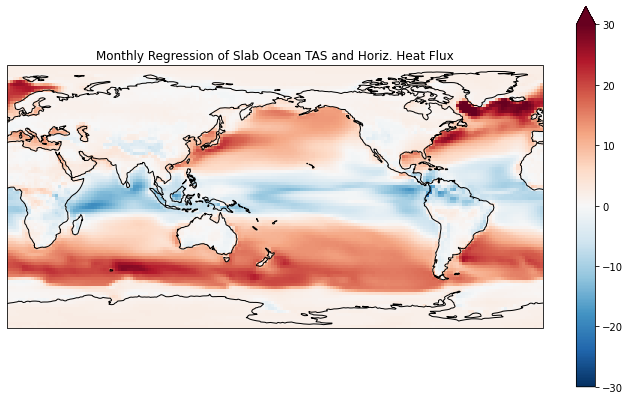

In [30]:
plt.rcParams['figure.figsize'] = [12, 7]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
tas_horiz_fit.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu_r', vmin=-30, vmax=30)
ax.coastlines(color='black', linewidth=1)
plt.title('Monthly Regression of Slab Ocean TAS and Horiz. Heat Flux')